## Download data

We illustrate the usage of LOG-TRAM by applying it to the GWAS summary statistics of BMI from BBJ and UKBB with 1 Mbp non-overlapping sliding windows as local regions. The GWAS datasets and LDscores files involved in the following example are availabel from [here](https://www.dropbox.com/sh/9asugdlu1lbal8o/AAB0martsgaBoR8B4hq2pc25a?dl=0)

## Run LOG-TRAM

Once the input files are formatted, LOG-TRAM will automatically preprocess the datasets, including SNPs overlapping and minor allele matching. It takes 8 mins to run the following meta-analysis for the whole genome (computing environment: 20 CPU cores of Intel(R) Xeon(R) Gold 6230N CPU @ 2.30GHz processor, 1TB of memory, and a 22 TB solid-state disk). 

In [ ]:
python <install path>/src/LOG-TRAM.py \
        --out BMI_meta \
        --sumstats-popu1 BMI_harmonized_pop1_UKB.txt,BMI_UKB \
        --sumstats-popu2 BMI_harmonized_pop2_BBJ.txt,BMI_BBJ \
        --ldscores ldsc_annot_1mb_TGP_hm3_chr@_std 

LOG-TRAM will output two meta-analysis files, corresponding to EAS and EUR respectively. LOG-TRAM will add the inputed phenotype name after `--out` argument automatically. Usually, we focus on the under-represented populations such as `BMI_meta_TRAM_pop2_BMI_BBJ.txt` for EAS.

## Visualize results

In [1]:
import pandas as pd
import numpy as np

In [62]:
eas_gwas = pd.read_csv('BMI_harmonized_pop2_BBJ.txt',sep='\t')
eas_meta = pd.read_csv('BMI_meta_TRAM_pop2_BMI_BBJ.txt',sep='\t')

In [63]:
eas_gwas

,CHR,BP,SNP,A1,A2,FRQ,BETA,SE,Z,P,N
0,1,752566,rs3094315,G,A,0.8438,-0.003592,0.006646,-0.540504,0.588900,85894
1,1,846808,rs4475691,C,T,0.1411,0.004290,0.006931,0.619041,0.535900,85894
2,1,854250,rs7537756,A,G,0.1766,0.001387,0.006327,0.219187,0.826500,85894
3,1,861808,rs13302982,A,G,0.5404,0.013898,0.004841,2.870656,0.004093,85894
4,1,863124,rs4040604,G,T,0.5421,0.013882,0.004843,2.866618,0.004145,85894
...,...,...,...,...,...,...,...,...,...,...,...
1095280,22,51162059,rs10451,G,A,0.3980,-0.004680,0.004929,-0.949503,0.342400,85894
1095281,22,51163138,rs715586,C,T,0.0663,0.000224,0.009697,0.023101,0.981600,85894
1095282,22,51165664,rs8137951,G,A,0.3924,-0.005141,0.004941,-1.040470,0.298100,85894
1095283,22,51171497,rs2301584,G,A,0.2496,-0.007770,0.005575,-1.393744,0.163400,85894


In [64]:
eas_meta
# N is the original GWAS sample size
# N_eff is the computed effective sample size
# N_eff should be larger than N as LOG-TRAM can brorrow information from the large-scale auxiliary dataset.

,CHR,BP,SNP,A1,A2,FRQ,BETA,SE,Z,P,N,N_eff
0,1,752566,rs3094315,G,A,0.8438,-0.001847,0.003542,-0.521517,0.602007,85894,147361.534765
1,1,846808,rs4475691,C,T,0.1411,0.002794,0.003884,0.719346,0.471928,85894,147361.534765
2,1,854250,rs7537756,A,G,0.1766,0.001950,0.003685,0.529203,0.596665,85894,147361.534765
3,1,861808,rs13302982,A,G,0.5404,0.011372,0.003917,2.903486,0.003690,85894,147361.534765
4,1,863124,rs4040604,G,T,0.5421,0.011671,0.003898,2.994431,0.002750,85894,147361.534765
...,...,...,...,...,...,...,...,...,...,...,...,...
1095280,22,51162059,rs10451,G,A,0.3980,-0.004674,0.003647,-1.281760,0.199927,85894,147361.534765
1095281,22,51163138,rs715586,C,T,0.0663,-0.001999,0.007429,-0.269035,0.787903,85894,147361.534765
1095282,22,51165664,rs8137951,G,A,0.3924,-0.004494,0.003717,-1.208869,0.226713,85894,147361.534765
1095283,22,51171497,rs2301584,G,A,0.2496,-0.005437,0.004559,-1.192591,0.233030,85894,147361.534765


In [65]:
from assocplots.manhattan import *
import warnings
warnings.filterwarnings('ignore')
from assocplots.qqplot import *
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
style.use('seaborn-white')
import seaborn as sns
import matplotlib
import sys  
sys.path.append('../src')
from plots import *

#### QQ-plot

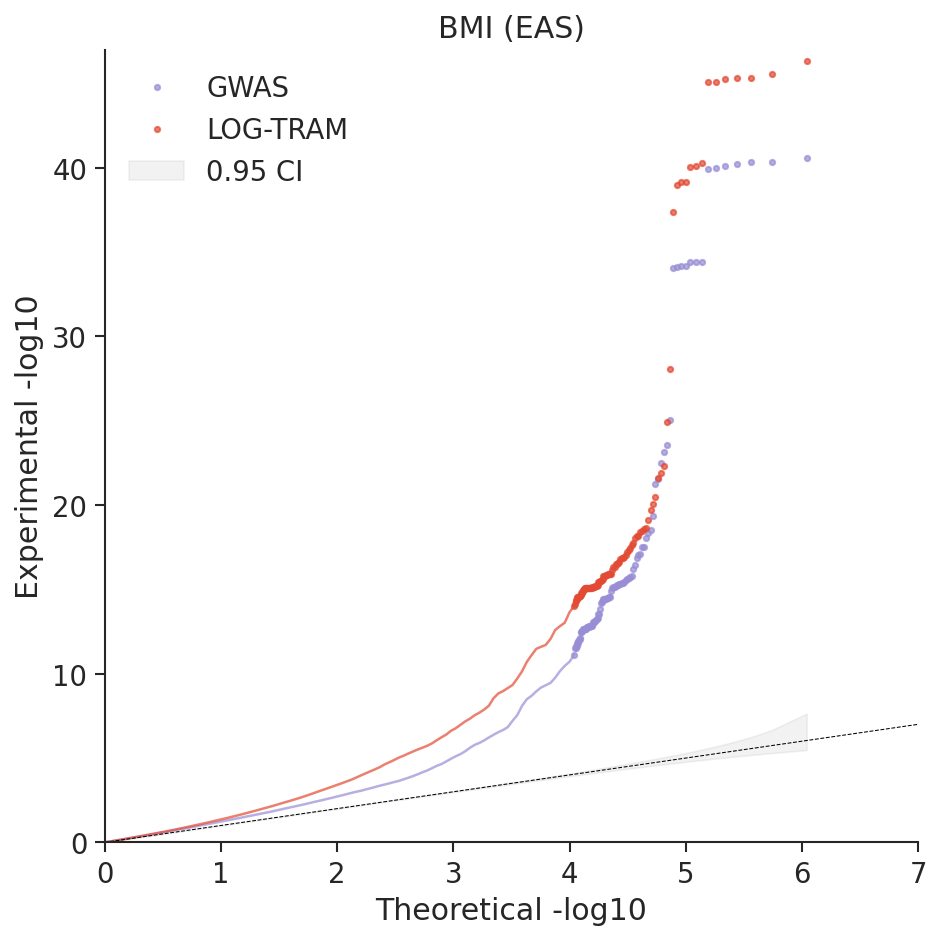

In [66]:
sns.set_context('paper',font_scale=1.5) 
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7,7
fig, ax = plt.subplots(1,1)
qqplot([eas_gwas['P'],eas_meta['P']], 
       ['GWAS','LOG-TRAM'], 
       color=['C2', 'C0', 'C2', 'C3', 'C4', 'C5'],
       shape=['.','.'],
       error_type='theoretical', 
       distribution='beta',
       n_quantiles = 100,
       ms=5,
       title='BMI (EAS)',ax=ax)

#### Manhatton plot

In [56]:
# identify lead SNPs from GWAS summary statistics
def add_locus(gwas):
    gwas_sig = gwas.loc[gwas['P']<=5e-8].reset_index(drop=True)
    loci = []
    c = 0
    bp = -1
    l = -1
    for row in gwas_sig.iterrows():
        if c!=row[1]['CHR'] or row[1]['BP']-bp>1000000:
            c = row[1]['CHR']
            bp = row[1]['BP']
            l += 1
        loci.append(l)
    gwas_sig['loci'] = loci
    gwas_sig = gwas_sig.loc[gwas_sig.groupby('loci')['P'].idxmin()].reset_index(drop=True)
    return gwas_sig

In [57]:
# maximum p-vaule = 1e-30
threshold = 1e-30
eas_gwas.loc[eas_gwas['P']<threshold,'P'] = threshold
eas_meta.loc[eas_meta['P']<threshold,'P'] = threshold

In [58]:
eas_gwas_sig = add_locus(eas_gwas)
eas_meta_sig = add_locus(eas_meta)

0

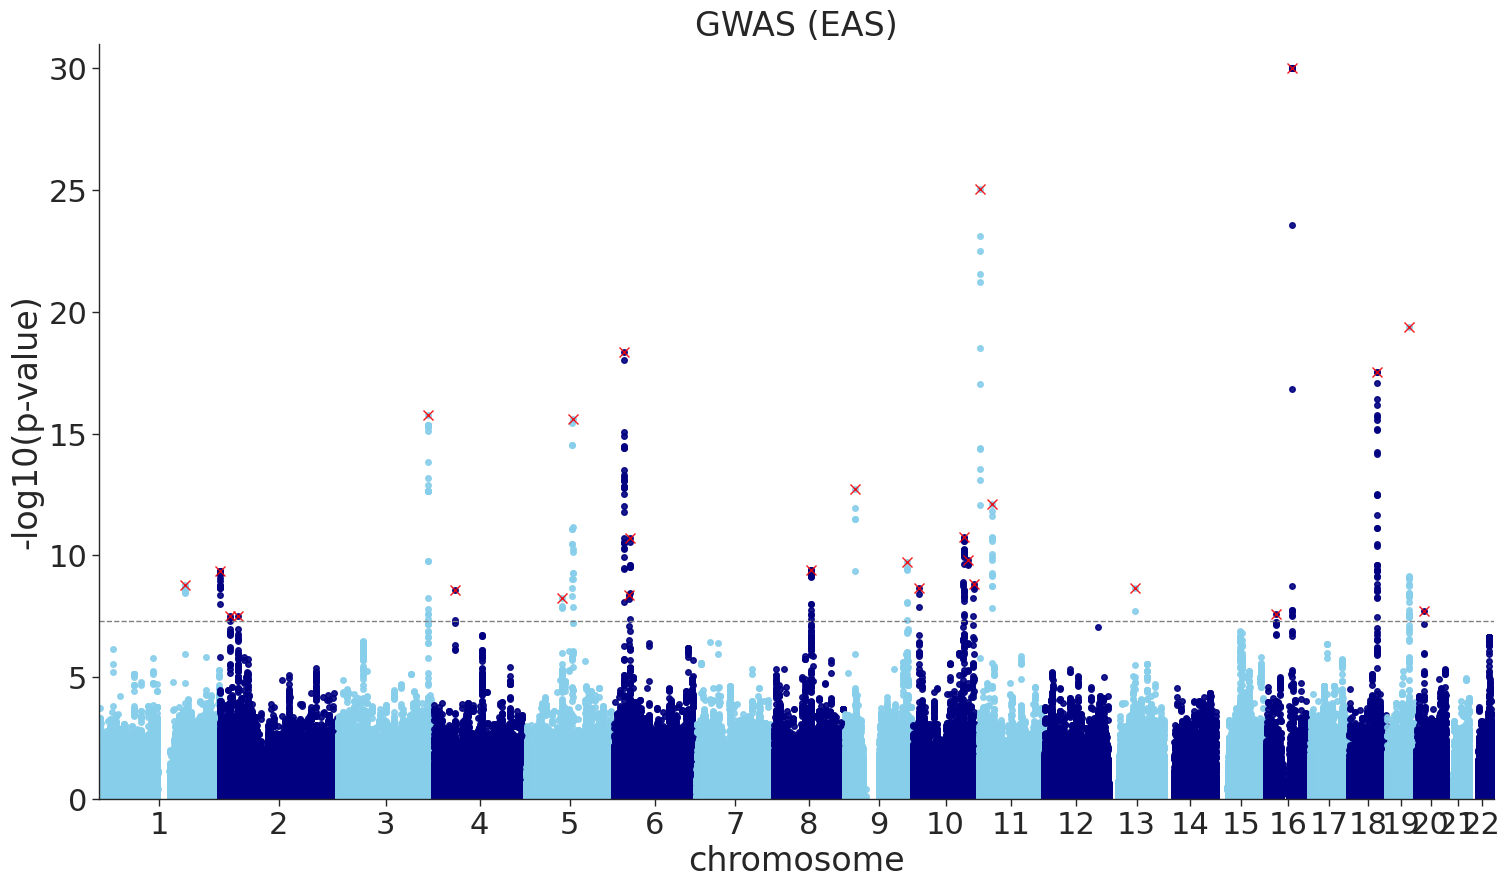

In [59]:
sns.set_context('paper',font_scale=2.5)
chrs = [str(i) for i in range(1,23)]
chrs_names = np.array([str(i) for i in range(1,23)])
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=18, 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
colors = ['skyblue','#000080']*11
manhattan(eas_gwas['P'], eas_gwas['BP'], eas_gwas['CHR'].astype(str), '',
          p2=eas_gwas_sig['P'], pos2=eas_gwas_sig['BP'], chr2=eas_gwas_sig['CHR'].astype(str), label2='',
       plot_type='single',
       chrs_plot=[str(i) for i in range(1,23)],
       chrs_names=chrs_names,
       cut = 0,
       title='{}'.format('GWAS (EAS)'),
       xlabel='chromosome',
       ylabel='-log10(p-value)',
       lines= [7.3],
       lines_styles = ['--'],
       top1=31,
       top2=31,
       lines_colors=['grey'],
       colors = colors,
       scaling = '-log10',alpha=0.9)

0

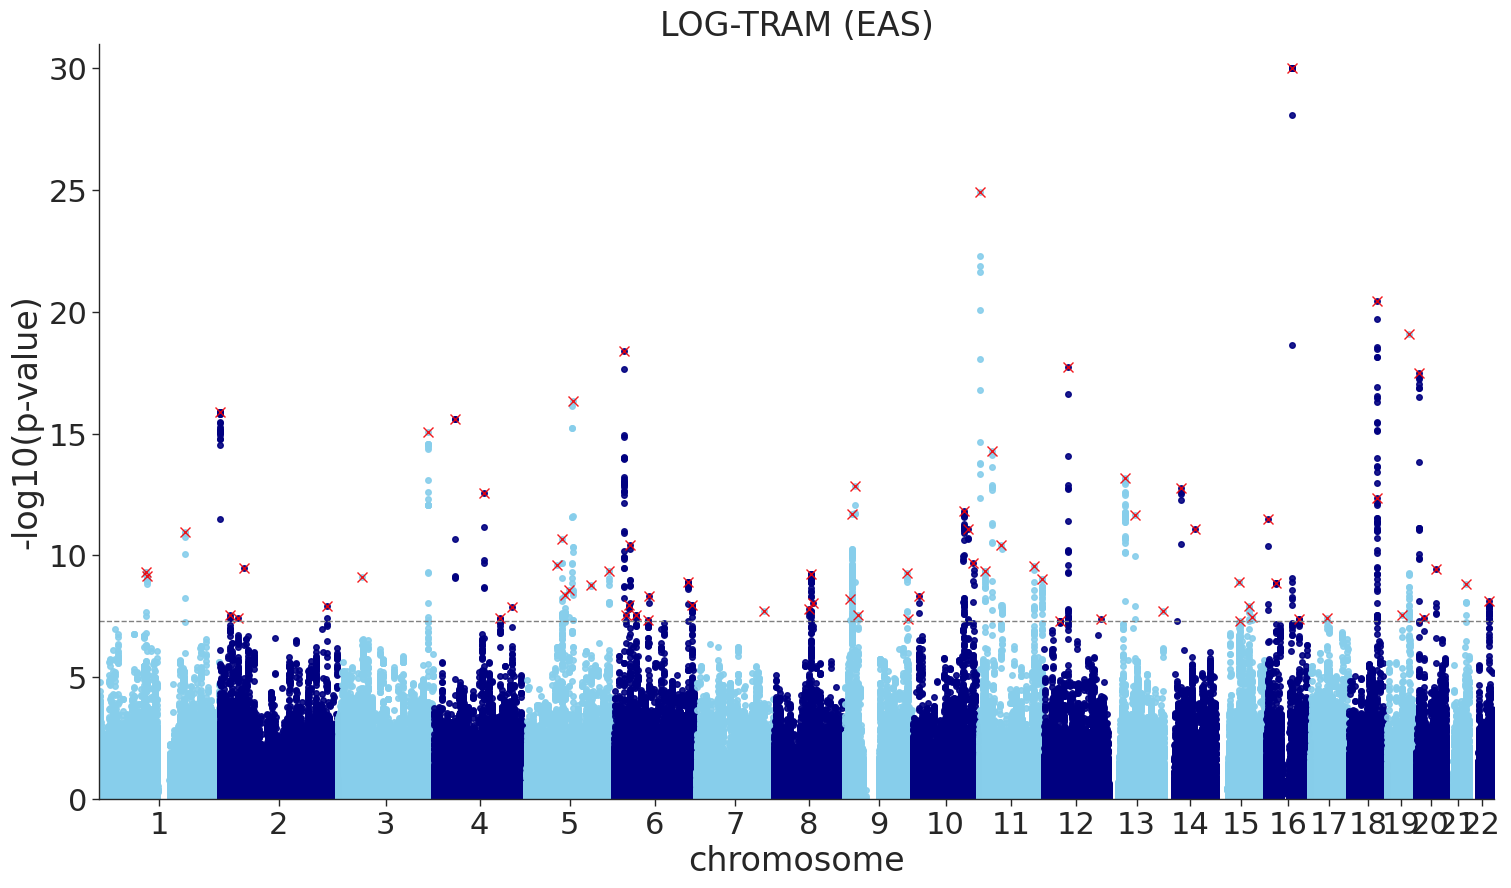

In [60]:
sns.set_context('paper',font_scale=2.5)
chrs = [str(i) for i in range(1,23)]
chrs_names = np.array([str(i) for i in range(1,23)])
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=18, 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
colors = ['skyblue','#000080']*11
manhattan(eas_meta['P'], eas_meta['BP'], eas_meta['CHR'].astype(str), '',
          p2=eas_meta_sig['P'], pos2=eas_meta_sig['BP'], chr2=eas_meta_sig['CHR'].astype(str), label2='',
       plot_type='single',
       chrs_plot=[str(i) for i in range(1,23)],
       chrs_names=chrs_names,
       cut = 0,
       title='{}'.format('LOG-TRAM (EAS)'),
       xlabel='chromosome',
       ylabel='-log10(p-value)',
       lines= [7.3],
       lines_styles = ['--'],
       top1=31,
       top2=31,
       lines_colors=['grey'],
       colors = colors,
       scaling = '-log10',alpha=0.9)